# Prediktiv analyse
Formålet med predikativ analyse er å finne trender for å kunne prediktere fremtidige resultater. Dette gjør man ved å implementere regresjon.

Første steg er å forberede dataene ved å identifisere relevante fukjoner og målvariabler. Man må også håndteere mangdlende verdier og se hvordan det kan påvirke modellenes nøyaktighet. 

Andre steg er å trene regresjonsmodellen på de rensede dataene og evaluere ytelsen. 


#### Manglende verdier
Forbreding og rensing av dataen er allerede en stor del av oppgaven. Datasettet er defor allerede veldig rent og vi har allerede definerte metoder på hvordan vi skal rense et datasett. For da å se nærmere på akuratt hvordan manglende data blir håndtert og hvordan det påvirker videre resultater kan man se på spesifike eksempler. 

Det er laget en class med tre funksjoner. Den første funksjonen lager en dataframe med flere NaN enn før og renser denne. Den andre funksjonen plotter både de originale verdierne og de utregnede verdiene for NaN. Den siste funksjonen finner forskjellige statistiske verdier og sammenligner de originale med de utregnede. 

In [1]:
import pandas as pd
import os
import sys 

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")

from modelling.missing_values import MissingValues
mv = MissingValues()


In [2]:
print(mv.make_dataframe("Middeltemp"))

(            Tid  Middeltemp
0    2014-01-01         3.4
1    2014-01-02         2.7
2    2014-01-03         4.2
3    2014-01-04         4.8
4    2014-01-05         3.7
..          ...         ...
195  2014-07-15        17.8
196  2014-07-16        20.2
197  2014-07-17        17.3
198  2014-07-18        18.5
199  2014-07-19        20.8

[200 rows x 2 columns],             Tid  Middeltemp
0    2014-01-01         3.4
1    2014-01-02         3.8
2    2014-01-03         4.2
3    2014-01-04         4.0
4    2014-01-05         3.7
..          ...         ...
195  2014-07-15        17.8
196  2014-07-16        18.0
197  2014-07-17        18.3
198  2014-07-18        18.5
199  2014-07-19        20.8

[200 rows x 2 columns])


Her kan man se at noen av verdiene er annerledes. Dette skylles at de ble erstattet med NaN, deretter utregnet til en tilnærmet verdi.

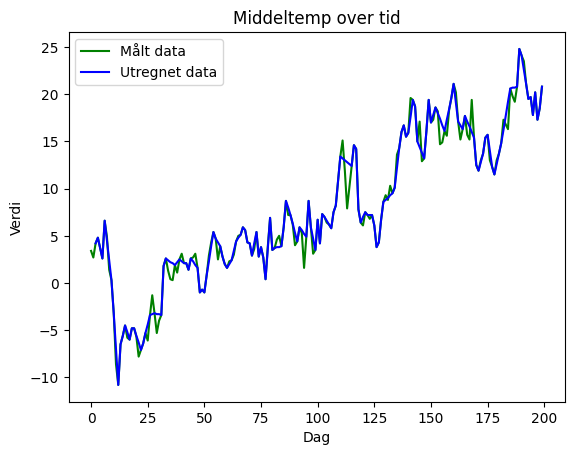

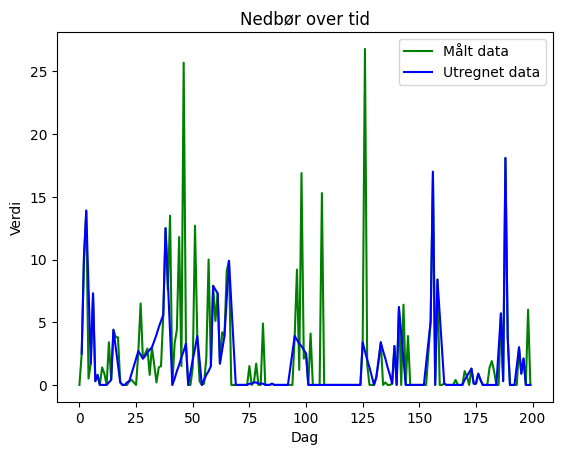

In [3]:
mv.measured_calculated_plot("Middeltemp")
mv.measured_calculated_plot("Nedbør",0.5)

Som man kan se i diagrammet er begge linjediagrammene tilsvarende like. Det som siller dem er at den målte dataen har flere verdier som er utenom normalen. Dette gjør at våre data mister ekstremverdier som er utenom normalen. Dette er fordi tilnærmingen bruker "interpolate(method='linear')" som bruker den siste kjente verdien før og første etter NaN. Dette kan påvikre forskjellige statistiske verdier som gjennomsnitt og typetall. 

In [4]:
print(mv.table("Middeltemp"))
print(mv.table("Middeltemp",0.7))

       Middeltemp (Original)  Middeltemp (Utrgnet)  Middeltemp (Differanse)
count                 200.00                200.00                     0.00
mean                    7.77                  7.72                     0.05
std                     7.81                  7.67                     0.14
min                   -10.80                 -8.60                    -2.20
25%                     2.70                  2.78                    -0.08
50%                     6.20                  6.20                     0.00
75%                    14.92                 15.12                    -0.20
max                    24.80                 24.10                     0.70
       Middeltemp (Original)  Middeltemp (Utrgnet)  Middeltemp (Differanse)
count                 200.00                195.00                     5.00
mean                    7.77                  7.86                    -0.09
std                     7.81                  7.46                     0.35
min         

"count" er antall elementer
"mean" er gjennomsnitt
"std" er standardavvik
"min" er den minste verdien i datasettet
"25%" er første kvartil, altså 25% av dataen er under verdien
"50%" er medianen 
"75%" er tredje kvartil, altså 75% av dataen er under verdien
"max" er den største verdien i datasettet 

Forskjellen i count skylles at endepunktene har NaN-verdier. Det er fordi "interpolate(method='linear')" avhenger av et start og sluttpunkt. 

Når "min" og "maks" ikke er det samme i Originalen som i den utregnede verdiens skylles det at "min"/"maks" er erstattet med NaN.


Gjennomsnitt, standardavvik, første kvartid, medianen og tredje kvartil er alle påvirket av at flere verdier i datasettet er anderledes. I eksempelet over er den første tabellen mer komplett enn den andre (frac=0.35, frac=0.5). Dette gjør at de forskjellige statistiske verdiene er veldig forskjellig fra hverandre. Det demonstrerer at det datasett med færre NaN gir et bredre resultat for statistiske utregninger enn et med flere NaN-verdier. 

